In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, RealData
import pandas as pd

In [2]:
g = np.genfromtxt('gaia_data_253_csv',skip_header=1,usecols=(12,13,31,32,72,77,82,100,101,102,106,107,108),delimiter=',')

# 0: logg
# 1: logg error
# 2: parallax
# 3: parallax error
# 4: phot_g_mean_mag
# 5: bp
# 6: rp
# 7: T_eff
# 8: T_eff percentile lower
# 9: T_eff percentile upper
# 10: e_bp_rp
# 11: e_bp_rp percentile lower
# 12: e_bp_rp percentile upper

# find out how many parallaxes are negative, and how many parallaxes and bp_rp values are NaN

x=0
for line in g:
    if line[2] <= 0:
        x=x+1
        
y=0
for line in g:
    if np.isnan(line[0]) == True:
        y=y+1

z=0
for line in g:
    if np.isnan(line[2]) == True:
        z=z+1
        
zz=0
for line in g:
    if np.isnan(line[5]) == True:
        zz=zz+1
        
zzz=0
for line in g:
    if np.isnan(line[6]) == True:
        zzz=zzz+1
        
zzzz=0
for line in g:
    if np.isnan(line[7]) == True:
        zzzz=zzzz+1
        
z5=0
for line in g:
    if np.isnan(line[10]) == True:
        z5=z5+1
        
# note that for some lines, both the parallax and bp_rp are NaN
        
print('Total number of objects in file:',int(np.size(np.transpose(g)[0])))
print('Number of non-positive parallaxes:',x)
print('Number of objects without a measurement for log(g).:',y)
print('Number of objects without a measurement for parallax:',z)
print('Number of objects without a measurement for bp:',zz)
print('Number of objects without a measurement for rp:',zzz)
print('Number of objects without a measurement for T_eff:',zzzz)
        
# remove non-positive parallaxes and lines where bp_rp or parallax is NaN by creating array
# containing the indices of the lines where that is the case:

a=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if (g[i][2] <= 0) or (np.isnan(g[i][2]) == True) or (np.isnan(g[i][5]) == True):
        a=np.append(a,i)

a = a.astype(int)        # np.delete wants integers
        
g = np.transpose(np.delete(g,a,0))   # transpose since columns and rows are mixed up

print('Number of objects in plot:',int(np.size(g[0])))

Total number of objects in file: 249
Number of non-positive parallaxes: 9
Number of objects without a measurement for log(g).: 0
Number of objects without a measurement for parallax: 1
Number of objects without a measurement for bp: 0
Number of objects without a measurement for rp: 0
Number of objects without a measurement for T_eff: 0
Number of objects in plot: 239


In [3]:
# remove all with parallax error larger than 20%

g = np.transpose(g)

p=np.array([])
for i in np.arange(int(np.size(np.transpose(g)[0]))):
    if g[i][2]/g[i][3] <= 5:
        p=np.append(p,i)
        
p = p.astype(int)

g = np.transpose(np.delete(g,p,0))

print('Number of objects:',int(np.size(g[0])))

Number of objects: 125


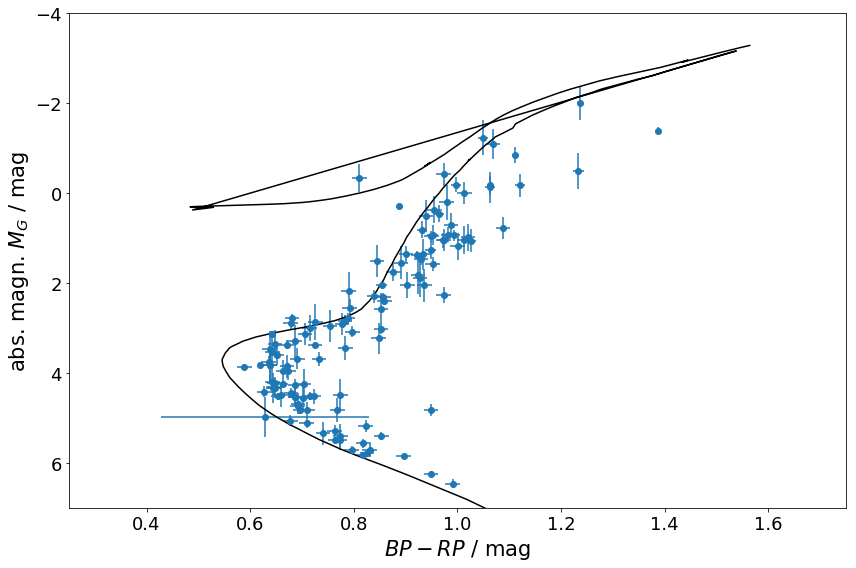

In [4]:
h1=g

M_G1 = h1[4] + 5 + 5*np.log10(h1[2]/1000)
#M_G2 = h2[4] + 5 + 5*np.log10(h2[2]/1000)

dG1=np.zeros(int(np.size(h1[0])))
for i in range(int(np.size(h1[0]))):
    if h1[4][i] <= 13:
        dG1[i] = 0.3*10**(-3)
    if h1[4][i] <= 17 and h1[4][i] >= 13:
        dG1[i] = 0.002
    if h1[4][i] >= 17:
        dG1[i] = 0.01

#dG2=np.zeros(int(np.size(h2[0])))
#for i in range(int(np.size(h2[0]))):
#    if h2[4][i] <= 13:
#        dG2[i] = 0.3*10**(-3)
#    if h2[4][i] <= 17 and h2[4][i] >= 13:
#        dG2[i] = 0.002
#    if h2[4][i] >= 17:
#        dG2[i] = 0.01        

dM_G1 = np.sqrt(dG1**2 + ((5/np.log(10))*(1/h1[2])*h1[3])**2)
#dM_G2 = np.sqrt(dG2**2 + ((5/np.log(10))*(1/h2[2])*h2[3])**2)

dBP1=np.zeros(int(np.size(h1[0])))
for i in range(int(np.size(h1[0]))):
    if h1[5][i] <= 13:
        dBP1[i] = 2*10**(-3)
    if h1[5][i] <= 17 and h1[5][i] >= 13:
        dBP1[i] = 0.01
    if h1[5][i] >= 17:
        dBP1[i] = 0.2
        
dRP1=np.zeros(int(np.size(h1[0])))
for i in range(int(np.size(h1[0]))):
    if h1[6][i] <= 13:
        dRP1[i] = 2*10**(-3)
    if h1[6][i] <= 17 and h1[6][i] >= 13:
        dRP1[i] = 0.01
    if h1[6][i] >= 17:
        dRP1[i] = 0.2
        
#dBP2=np.zeros(int(np.size(h2[0])))
#for i in range(int(np.size(h2[0]))):
#    if h2[5][i] <= 13:
#        dBP2[i] = 2*10**(-3)
#    if h2[5][i] <= 17 and h2[5][i] >= 13:
#        dBP2[i] = 0.01
#    if h2[5][i] >= 17:
#        dBP2[i] = 0.2
        
#dRP2=np.zeros(int(np.size(h2[0])))
#for i in range(int(np.size(h2[0]))):
#    if h2[6][i] <= 13:
#        dRP2[i] = 2*10**(-3)
#    if h2[6][i] <= 17 and h2[6][i] >= 13:
#        dRP2[i] = 0.01
#    if h2[6][i] >= 17:
#        dRP2[i] = 0.2

dBP_RP1 = np.sqrt(dBP1**2+dRP1**2)#+(h1[8]*(h1[10]-h1[9])/2)**2)
#dBP_RP2 = np.sqrt(dBP2**2+dRP2**2)

iso = np.transpose(np.genfromtxt('isochrones/isochrone_12Gyr__2_0.txt',skip_header=11,skip_footer=1))

plt.figure(figsize=(12,8))
plt.errorbar(h1[5]-h1[6],M_G1,xerr=dBP_RP1,yerr=dM_G1,linestyle='None',marker='o')
#plt.errorbar(h2[5]-h2[6],M_G2,xerr=dBP_RP2,yerr=dM_G2,linestyle='None',marker='o',label='e(br_bp)=0')
plt.plot(iso[12]-iso[13],iso[11],color='black')
plt.ylim(7,-4)
plt.xlim(0.25,1.75)
plt.yticks(size=18)
plt.xticks(size=18)
plt.xlabel('$BP-RP$ / mag',size=21)
plt.ylabel('abs. magn. $M_G$ / mag',size=21)
plt.tight_layout()
#plt.title('Isochrone (age=12Gyr) of metallicity [M/H]=-2.0, 125 objects with error ellipsis',size=20)
plt.savefig('Abbildungen/mass_determination.png')
#plt.legend(fontsize=16)

In [5]:
# the masses far from the isochrone are not reliable; don't calculate those with (bp_rp)_0 < 0.4

# determination of the masses of the 78 objects

M1 = np.zeros(int(np.size(h1[0])))
for k in range(int(np.size(h1[0]))):
    if h1[5][k] > 0.4:
        delta1 = np.zeros(int(np.size(iso[5])))
        for i in range(int(np.size(iso[5]))):
            delta1[i] = np.sqrt( ( ( (iso[12][i]-iso[13][i]) - (h1[5][k]-h1[6][k]) )/(dBP_RP1[k]) )**2 + ( (iso[11][i] - M_G1[k])/dM_G1[k] )**2)
        w1 = np.where(delta1 == np.amin(delta1))
        M1[k] = iso[5][int(w1[0])]
    else:
        M1[k] = np.nan

# determination of the masses of the 51 objects

#M2 = np.zeros(int(np.size(h2[0])))
#for k in range(int(np.size(h2[0]))):
#    delta2 = np.zeros(int(np.size(iso[5])))
#    for i in range(int(np.size(iso[5]))):
#        delta2[i] = np.sqrt( ( ( (iso[12][i]-iso[13][i]) - (h2[5][k]-h2[6][k]) )/(dBP_RP2[k]) )**2 + ( (iso[11][i] - M_G2[k])/dM_G2[k] )**2)
#    w2 = np.where(delta2 == np.amin(delta2))
#    M2[k] = iso[5][int(w2[0])]

In [6]:
# bolometric correction

a1 = -0.190537*10**5
b1 = 0.15514*10**5
c1 = -0.42127*10**4
d1 = 0.38147*10**3
a2 = -0.3705*10**5
b2 = 0.385672*10**5
c2 = -0.15065*10**5
d2 = 0.26172*10**4
e2 = -0.17062*10**3

bol_cor = np.zeros(np.size(g[0]))
for i in range(np.size(g[0])):
    if np.log10(g[7][i]) < 3.7:
        bol_cor[i] = a1+b1*np.log10(g[7][i])+c1*(np.log10(g[7][i]))**2+d1*(np.log10(g[7][i]))**3
    else:
        bol_cor[i] = a2+b2*np.log10(g[7][i])+c2*(np.log10(g[7][i]))**2+d2*(np.log10(g[7][i]))**3+e2*(np.log10(g[7][i]))**4

In [7]:
# extinction

e_b_v = np.genfromtxt('gaia_data_253_csv_ebv',delimiter=',',skip_header=1,usecols=7)
e_b_v = np.delete(e_b_v,a)
e_b_v = np.delete(e_b_v,p)

In [8]:
par = g[2]/1000                                                # parallax from Gaia
g_s = 28*981*np.ones(np.size(par))                            # surface gravity of the sun / m/s^2
M_M_s = M1                                                     # mass of object / M_sun
T_eff = g[7]                                                   # effective Temp. / K from Gaia
T_eff_s = 5777*np.ones(np.size(par))                           # effective Temp. of sun / K
V = g[4]+0.0176+0.00686*(g[5]-g[6])+0.1732*(g[5]-g[6])**2      # visual magnitude of object (Evans et al. 2018)
BC = bol_cor                                                   # bolometric correction for object
A_V = 3.2*e_b_v                                                # extinction for object
M_bol_s = 4.81*np.ones(np.size(par))                           # bolometric magnitude of sun / mag

In [9]:
# formula from Perryman

logg = 2*np.log10(par)+np.log10(g_s)+np.log10(M_M_s)+4*np.log10(T_eff/T_eff_s)+0.4*(V-A_V+BC+5-M_bol_s)

dlogg_u = (2/np.log(10))*np.sqrt((g[3]/g[2])**2+(2*(g[9]-T_eff)/T_eff)**2)
dlogg_l = (2/np.log(10))*np.sqrt((g[3]/g[2])**2+(2*(T_eff-g[8])/T_eff)**2)

In [10]:
# to create a table with all that I've calculated; first find out indices 
# which will have NaN due to parallax condition: stored in a

gt = np.genfromtxt('gaia_data_253_csv_ebv',skip_header=1,delimiter=',')

a=np.array([])
for i in np.arange(int(np.size(np.transpose(gt)[0]))):
    if (gt[int(i)][39] <= 0) or (np.isnan(gt[int(i)][39]) == True) or (np.abs(gt[i][39]/gt[i][40]) <= 5):
        a=np.append(a,i)

# indices not in a
b=np.array([])
for i in np.arange(int(np.size(np.transpose(gt)[0]))):
    if (gt[int(i)][39] > 0) and (np.isnan(gt[int(i)][39]) == False) and (np.abs(gt[i][39]/gt[i][40]) > 5):
        b=np.append(b,i)
        
a = a.astype(int)        # np.delete wants integers
        
gt = np.transpose(np.delete(gt,a,0))   # transpose since columns and rows are mixed up

In [11]:
Vmag=np.zeros(249)

for i in a:
    Vmag[i]=np.nan

for i in range(np.size(V)):
    Vmag[int(b[i])]=V[i]

    
masses=np.zeros(249)

for i in a:
    masses[i]=np.nan

for i in range(np.size(V)):
    masses[int(b[i])]=M_M_s[i]
    

bolcor=np.zeros(249)

for i in a:
    bolcor[i]=np.nan

for i in range(np.size(V)):
    bolcor[int(b[i])]=BC[i]
    
    
grav=np.zeros(249)

for i in a:
    grav[i]=np.nan

for i in range(np.size(V)):
    grav[int(b[i])]=logg[i]
    

grav_u=np.zeros(249)

for i in a:
    grav_u[i]=np.nan

for i in range(np.size(V)):
    grav_u[int(b[i])]=dlogg_u[i]
    
    
grav_l=np.zeros(249)

for i in a:
    grav_l[i]=np.nan

for i in range(np.size(V)):
    grav_l[int(b[i])]=dlogg_l[i]
    
    
df = pd.read_csv(r'transitional_table2.csv')

Vmagn = pd.DataFrame(data = Vmag,columns=['Vmag'])
mass = pd.DataFrame(data = masses,columns=['M/M_s'])
B_C = pd.DataFrame(data = bolcor,columns=['B.C.'])
loggg = pd.DataFrame(data = grav,columns=['logg'])
loggg_u = pd.DataFrame(data = grav_u,columns=['logg_upper_e'])
loggg_l = pd.DataFrame(data = grav_l,columns=['logg_lower_e'])

new = pd.concat([df['name'],df['source_id'],df['ra'],df['dec'],df['parallax'],df['parallax_error'],df['Gmag'],df['bp_rp'],df['EBminV'],Vmagn,mass,B_C,loggg,loggg_u,loggg_l],axis=1)

new.to_csv('3rdsample.csv',index=False)

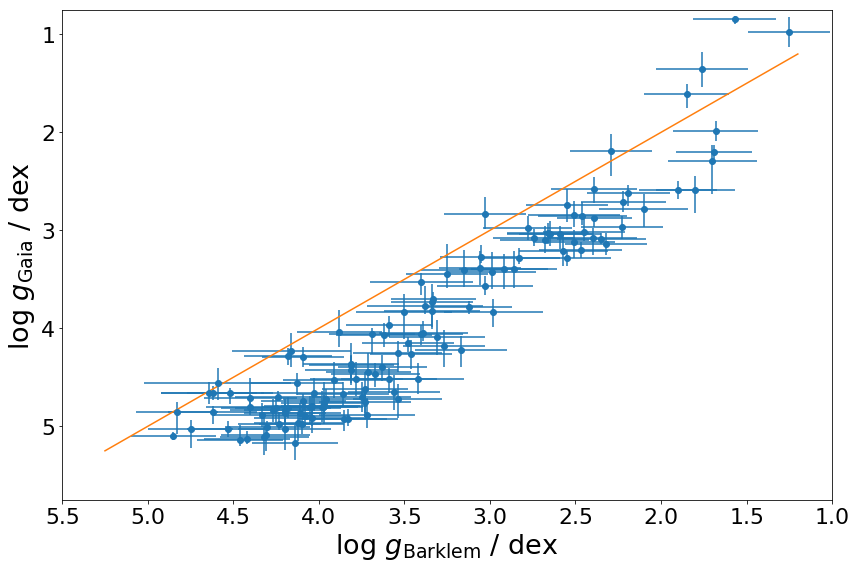

In [12]:
def lin(x,a,b):
    return a*x+b

x=np.linspace(1.2,5.25)
plt.figure(figsize=(12,8))
plt.errorbar(g[0],logg,xerr=g[1],yerr=[dlogg_l,dlogg_u],linestyle='None',marker='o')
plt.plot(x,lin(x,1,0))
plt.xlim(5.5,1)
plt.ylim(5.75,0.75)
#plt.title('log(g) from Gaia DR2 against log(g) from Hamburg/ESO survey', size=20)
plt.xlabel('$\log\ g_{\mathrm{Barklem}}$ / dex',size=27)
plt.ylabel('$\log\ g_{\mathrm{Gaia}}$ / dex',size=27)
plt.yticks(size=22)
plt.xticks(size=22)
plt.tight_layout()
plt.savefig('Abbildungen/logg_vs_logg_errorbars.png')

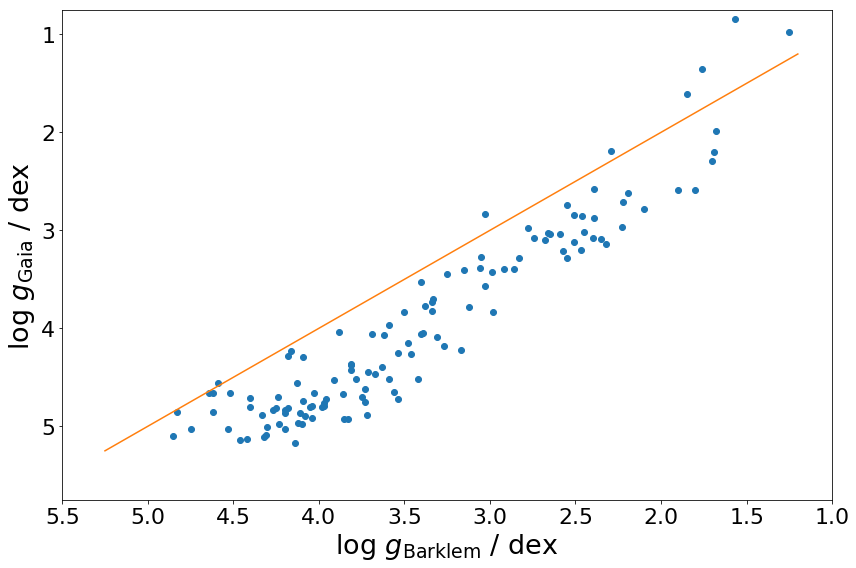

In [13]:
x=np.linspace(1.2,5.25)
plt.figure(figsize=(12,8))
plt.scatter(g[0],logg)
plt.plot(x,lin(x,1,0),color='tab:orange')
plt.xlim(5.5,1)
plt.ylim(5.75,0.75)
#plt.title('log(g) from Gaia DR2 against log(g) from Hamburg/ESO survey', size=20)
plt.xlabel('$\log\ g_{\mathrm{Barklem}}$ / dex',size=27)
plt.ylabel('$\log\ g_{\mathrm{Gaia}}$ / dex',size=27)
plt.yticks(size=22)
plt.xticks(size=22)
plt.tight_layout()
plt.savefig('Abbildungen/logg_vs_logg.png')

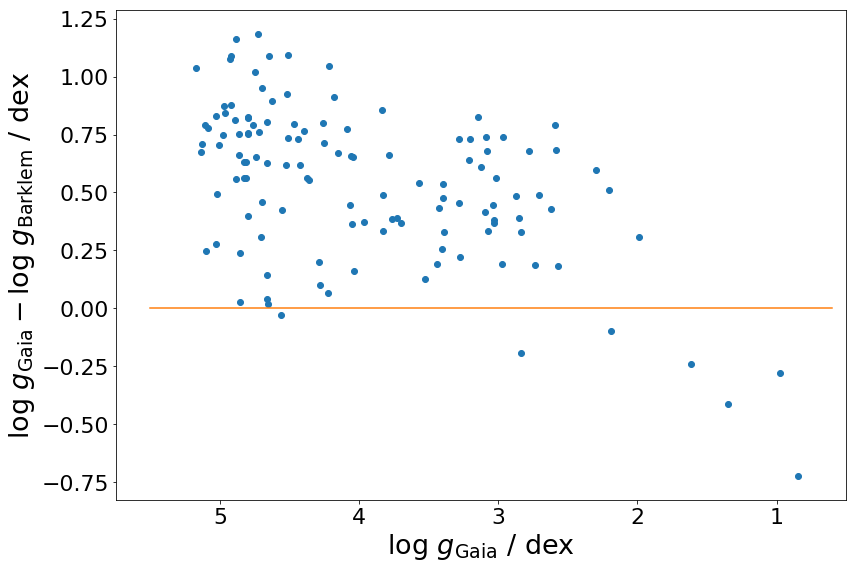

In [14]:
x=np.linspace(0.6,5.5)
plt.figure(figsize=(12,8))
plt.scatter(logg,logg-g[0])
plt.plot(x,lin(x,0,0),color='tab:orange')
plt.xlim(5.75,0.5)
#plt.title('Residual plot of surface gravities', size=20)
plt.xlabel('$\log\ g_{\mathrm{Gaia}}$ / dex',size=27)
plt.ylabel('$\log\ g_{\mathrm{Gaia}} - \log\ g_{\mathrm{Barklem}}$ / dex',size=27)
plt.yticks(size=22)
plt.xticks(size=22)
plt.tight_layout()
plt.savefig('Abbildungen/logg_vs_logg_residual_plot.png')

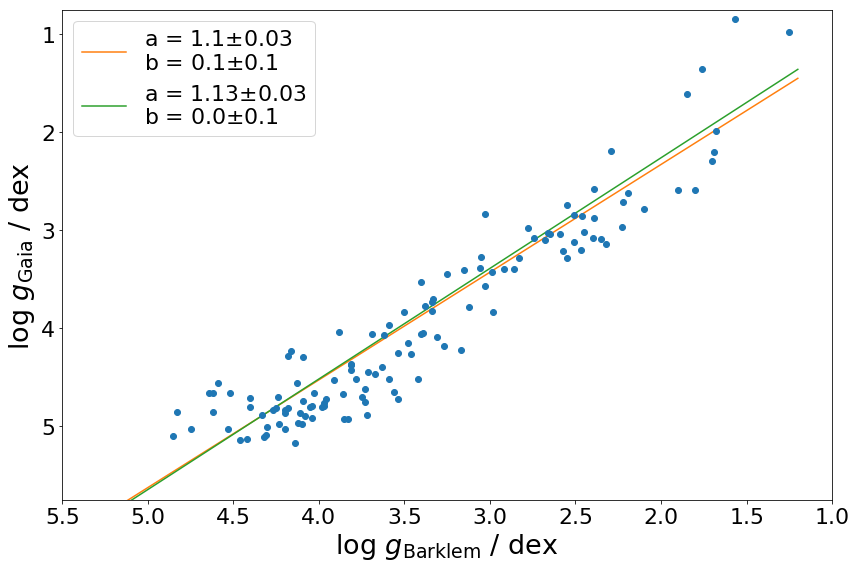

In [15]:
h=np.transpose(g)

z=np.array([])
for i in range(np.size(g[0])):
    if np.isnan(logg[i]) == True:
        z=np.append(z,i)
    
z=z.astype('int')

h=np.transpose(np.delete(h,z,0))
logg1=np.delete(logg,z,0)
dlogg1_u=np.delete(dlogg_u,z,0)
dlogg1_l=np.delete(dlogg_l,z,0)


popt1,pcov1=curve_fit(lin,h[0],logg1,sigma=dlogg1_u)
popt2,pcov2=curve_fit(lin,h[0],logg1,sigma=dlogg1_l)

x=np.linspace(1.2,5.25)
plt.figure(figsize=(12,8))
plt.errorbar(h[0],logg1,linestyle='None',marker='o')
plt.plot(x,lin(x,popt1[0],popt1[1]),label='a = '+str(round((popt1[0]),2))+'$\pm$'+str(round((np.sqrt(pcov1[0][0])),2))+'\nb = '+str(round((popt1[1]),1))+'$\pm$'+str(round((np.sqrt(pcov1[1][1])),1)))
plt.plot(x,lin(x,popt2[0],popt2[1]),label='a = '+str(round((popt2[0]),2))+'$\pm$'+str(round((np.sqrt(pcov2[0][0])),2))+'\nb = '+str(round((popt2[1]),1))+'$\pm$'+str(round((np.sqrt(pcov2[1][1])),1)))
plt.xlim(5.5,1)
plt.ylim(5.75,0.75)
#plt.title('log(g) from Gaia DR2 against log(g) from Hamburg/ESO survey, parameters a+b', size=20)
plt.xlabel('$\log\ g_{\mathrm{Barklem}}$ / dex',size=27)
plt.ylabel('$\log\ g_{\mathrm{Gaia}}$ / dex',size=27)
plt.yticks(size=22)
plt.xticks(size=22)
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Abbildungen/logg_vs_logg_fit2.png')

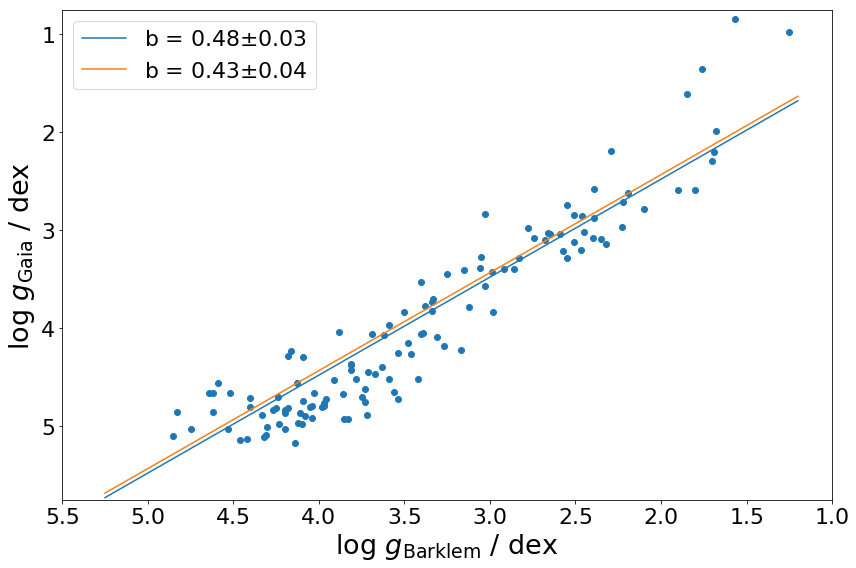

In [16]:
def lin1(x,b):
    return x + b

popt3,pcov3=curve_fit(lin1,h[0],logg1,sigma=dlogg1_u)
popt4,pcov4=curve_fit(lin1,h[0],logg1,sigma=dlogg1_l)

x=np.linspace(1.2,5.25)
plt.figure(figsize=(12,8))
plt.scatter(h[0],logg1,linestyle='None',marker='o')
plt.plot(x,lin1(x,popt3[0]),label='b = '+str(round((popt3[0]),2))+'$\pm$'+str(round((np.sqrt(pcov3[0][0])),2)))
plt.plot(x,lin1(x,popt4[0]),label='b = '+str(round((popt4[0]),2))+'$\pm$'+str(round((np.sqrt(pcov4[0][0])),2)))
plt.xlim(5.5,1)
plt.ylim(5.75,0.75)
#plt.title('log(g) from Gaia DR2 against log(g) from Hamburg/ESO survey, parameter b', size=20)
plt.xlabel('$\log\ g_{\mathrm{Barklem}}$ / dex',size=27)
plt.ylabel('$\log\ g_{\mathrm{Gaia}}$ / dex',size=27)
plt.yticks(size=22)
plt.xticks(size=22)
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Abbildungen/logg_vs_logg_fit1.png')

The object in the bottom left corner is HD 221170 in the Barklem catalogue, 2869759781250083200 in Gaia DR2 after crossmatch.


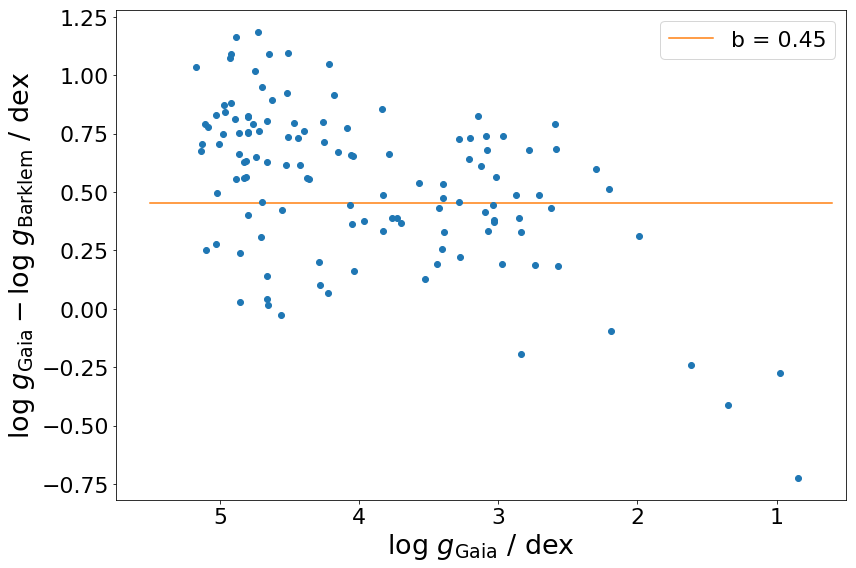

In [17]:
offset = (popt3[0]+popt4[0])/2

x=np.linspace(0.6,5.5)
plt.figure(figsize=(12,8))
plt.errorbar(logg1,logg1-h[0],marker='o',linestyle='None')
plt.plot(x,lin(x,0,offset),label='b = '+str(round(offset,2)))
plt.xlim(5.75,0.5)
plt.xlabel('$\log\ g_{\mathrm{Gaia}}$ / dex',size=27)
plt.ylabel('$\log\ g_{\mathrm{Gaia}} - \log\ g_{\mathrm{Barklem}}$ / dex',size=27)
plt.yticks(size=22)
plt.xticks(size=22)
#plt.title('Residual plot of surface gravities, offset b = '+str(round(offset,2)),size=20)
plt.legend(fontsize=22)
plt.tight_layout()
plt.savefig('Abbildungen/logg_vs_logg_residual_plot_fit.png')

print('The object in the bottom left corner is HD 221170 in the Barklem catalogue, 2869759781250083200 in Gaia DR2 after crossmatch.')